In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Initial values for smoking behavior

Take the data with the information about smoke behavior.

In [2]:
tobacco = pd.read_csv('raw_data/tobacco.csv', index_col=[0])
tobacco.replace(1,0.1,inplace=True)
tobacco.replace(2,0.5,inplace=True)
tobacco.replace(3,0.9,inplace=True)
tobacco.head(5)

,t1,t2,t3
s001,0.5,0.1,0.1
s002,0.1,0.1,0.1
s003,0.9,0.9,0.9
s004,0.1,0.1,0.1
s005,0.1,0.1,0.1


In [3]:
tobacco.ix['s048']

t1    NaN
t2    0.1
t3    0.1
Name: s048, dtype: float64

In [4]:
's048' in list(tobacco[pd.isnull(tobacco['t1'])].index.values)

True

In [5]:
# Get the list of nodes with nan values for tobacco
list_nans = list(tobacco[pd.isnull(tobacco['t1'])].index.values)
list_nans = list_nans + list(tobacco[pd.isnull(tobacco['t2'])].index.values)
list_nans = list_nans + list(tobacco[pd.isnull(tobacco['t3'])].index.values)

In [6]:
's048' in list_nans

True

In [7]:
status = tobacco.dropna()['t1']
status_temp = status.to_dict()
status_dict = {}
for key,value in status_temp.items():
    status_dict[key] = float(value)
#type(status_dict['s048'])

In [8]:
status_dict['s002']

0.1

### Loading the networks

The first step is to read the raw data with the friendship levels and convert them to our model's format, normalizing it.

In [9]:
friendship1 = pd.read_csv('raw_data/friendship.1.csv', index_col=[0])
friendship1.head()

,s001,s002,s003,s004,s005,s006,s007,s008,s009,s010,...,s151,s152,s153,s154,s155,s156,s157,s158,s159,s160
s001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,10,10,10,10,0.0,10,10,10
s002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,10,10,10,10,0.0,10,10,10
s003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,10,10,10,10,0.0,10,10,10
s004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,0.0,0.0,10,10,10,10,0.0,10,10,10
s005,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,2.0,...,0.0,0.0,10,10,10,10,0.0,10,10,10


In [10]:
friendship1.replace(1, 0.9, inplace=True)
friendship1.replace(2, 0.5, inplace=True)
friendship1.replace(0, 0.1, inplace=True)
friendship1.replace(10, 0, inplace=True)
friendship1.head()

,s001,s002,s003,s004,s005,s006,s007,s008,s009,s010,...,s151,s152,s153,s154,s155,s156,s157,s158,s159,s160
s001,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,...,0.1,0.1,0,0,0,0,0.1,0,0,0
s002,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,...,0.1,0.1,0,0,0,0,0.1,0,0,0
s003,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,...,0.1,0.1,0,0,0,0,0.1,0,0,0
s004,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.5,0.1,0.1,...,0.1,0.1,0,0,0,0,0.1,0,0,0
s005,0.1,0.1,0.1,0.1,0.1,0.5,0.1,0.1,0.1,0.5,...,0.1,0.1,0,0,0,0,0.1,0,0,0


#### Cleaning up the list of nans

In [11]:
# df.drop(['x','y'], axis=1)
network = friendship1.drop(list_nans).drop(list_nans, axis=1)

In [12]:
#network.isnull()
network = network.fillna(0)
#network
#tobacco[pd.isnull(tobacco['t3'])].index.values
#network[pd.isnull(network.columns)]

In [13]:
#network.ix['s004']

In [14]:
type(network.values[0][0])

numpy.float64

### Set up

Setting up the initial values for time, number of agents

In [15]:
time = 50

### Creating the network for gephi

Creates a graph from the adjacency matrix

In [16]:
import networkx as nx

In [17]:
network_ = (network.values).astype(np.float32)
type(network_)
network_

array([[ 0.1       ,  0.1       ,  0.1       , ...,  0.1       ,
         0.1       ,  0.1       ],
       [ 0.1       ,  0.1       ,  0.1       , ...,  0.1       ,
         0.1       ,  0.1       ],
       [ 0.1       ,  0.1       ,  0.1       , ...,  0.1       ,
         0.1       ,  0.1       ],
       ..., 
       [ 0.1       ,  0.1       ,  0.1       , ...,  0.1       ,
         0.89999998,  0.1       ],
       [ 0.1       ,  0.1       ,  0.1       , ...,  0.89999998,
         0.1       ,  0.1       ],
       [ 0.1       ,  0.1       ,  0.1       , ...,  0.1       ,
         0.1       ,  0.1       ]], dtype=float32)

In [18]:
# Create the edges
np.fill_diagonal(network_, 0)
print network_ 

[[ 0.          0.1         0.1        ...,  0.1         0.1         0.1       ]
 [ 0.1         0.          0.1        ...,  0.1         0.1         0.1       ]
 [ 0.1         0.1         0.         ...,  0.1         0.1         0.1       ]
 ..., 
 [ 0.1         0.1         0.1        ...,  0.          0.89999998  0.1       ]
 [ 0.1         0.1         0.1        ...,  0.89999998  0.          0.1       ]
 [ 0.1         0.1         0.1        ...,  0.1         0.1         0.        ]]


In [19]:
# We transposed the matrix network_ because the origin and target of the edges is inverted for our purposes
g = nx.from_numpy_matrix(network_.T, create_using=nx.MultiDiGraph())

In [20]:
# Just for check if the nodes are labeled correctly
old_labels = list(g.nodes())

In [21]:
# Save the old values for checking
dict_attributes = dict(zip(old_labels, old_labels))

dictlist = [dict() for x in range(len(old_labels))]
dictActivityTimeLine = dict(zip(old_labels, dictlist))
nx.set_node_attributes(g, 'old_id', dict_attributes)
nx.set_node_attributes(g, 'activityTimeLine', dictActivityTimeLine)

#### Edges

In [26]:
for source, target in g.edges():
    g[source][target].update(weightTimeLine={0:g.get_edge_data(source,target)[0]['weight']})

In [30]:
g.get_edge_data(2,0)

{0: {'weight': 0.10000000149011612},
 'weightTimeLine': {0: 0.10000000149011612}}

In [24]:
g.node[30]

{'activityTimeLine': {}, 'old_id': 30}

In [31]:
relabel_dict = dict(zip(old_labels, network.columns.values))

In [32]:
g = nx.relabel_nodes(g, relabel_dict)

In [33]:
g.node[1]

KeyError: 1

In [34]:
g.node['s003']

{'activityTimeLine': {}, 'old_id': 2}

In [35]:
#states = map(float, states)
#dict_states = dict(zip(old_labels, states))
nx.set_node_attributes(g, 'state', status_dict)

In [36]:
for node in g.nodes():
    state_node = g.node[node]['state']
    g.node[node]['activityTimeLine'].update({0:state_node})

In [37]:
print type(g.node['s003']['state'])
g.node['s003']

<type 'float'>


{'activityTimeLine': {0: 0.9}, 'old_id': 2, 'state': 0.9}

In [38]:
nx.write_gexf(g, 'graph_teen.gexf')

## Updating the values of edges and states over time
Change the values over time

In [39]:
import edges_update as eu
import states_update as su

In [48]:
reload(eu)
reload(su)

<module 'states_update' from 'states_update.py'>

In [62]:
g_old = g.copy()
#g_temp = g.copy()
for t in range(1,time):
    g_temp = eu.edges_update(g_old, t)
    g_new = su.states_update(g_temp, t, 'original')
    g_old = g_new.copy()

10
10
20
20
30
30
40
40


In [63]:
g_new.get_edge_data('s070', 's071')

{0: {'weight': 0.4382949113057786},
 'weightTimeLine': {0: 0.10000000149011612,
  1: 0.1036287367380723,
  2: 0.10737371566109077,
  3: 0.11123512833503664,
  4: 0.11521524643532378,
  5: 0.11931713069423028,
  6: 0.12354401445636896,
  7: 0.12789903168192918,
  8: 0.13238511438668527,
  9: 0.1370049689837679,
  10: 0.14176108549290767,
  11: 0.14665575698906266,
  12: 0.151691098843847,
  13: 0.1568690635160196,
  14: 0.16219144969298888,
  15: 0.16765990601750422,
  16: 0.17327593019467094,
  17: 0.17904086442276157,
  18: 0.18495588804643365,
  19: 0.1910220082050203,
  20: 0.19724004910739146,
  21: 0.20361064043458707,
  22: 0.21013420526123933,
  23: 0.21681094779989038,
  24: 0.2236408412064014,
  25: 0.23062361563640943,
  26: 0.23775874670859237,
  27: 0.24504544450690396,
  28: 0.25248264323812664,
  29: 0.2600689916507017,
  30: 0.26780284431399615,
  31: 0.27568225385254425,
  32: 0.2837049642262917,
  33: 0.2918684051446913,
  34: 0.30016968769907165,
  35: 0.3086056012936

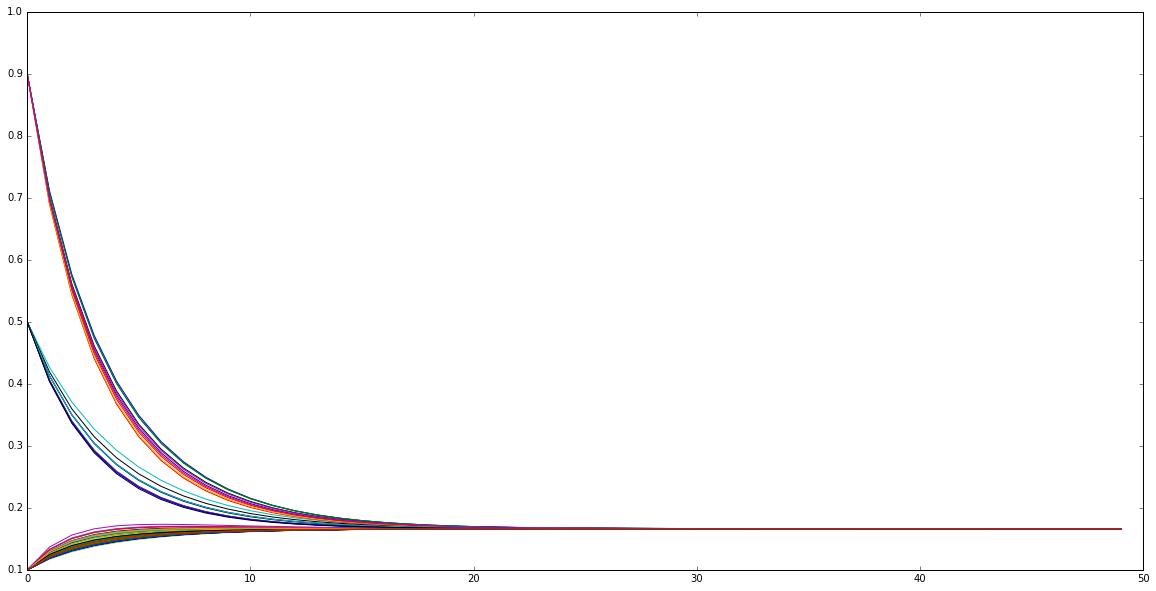

In [64]:
plt.figure(figsize=(20,10))
for node in g_new.nodes():
    state_tuples = g_new.node[node]['activityTimeLine'].items()
    plt.plot(*zip(*state_tuples))
    #plt.show()

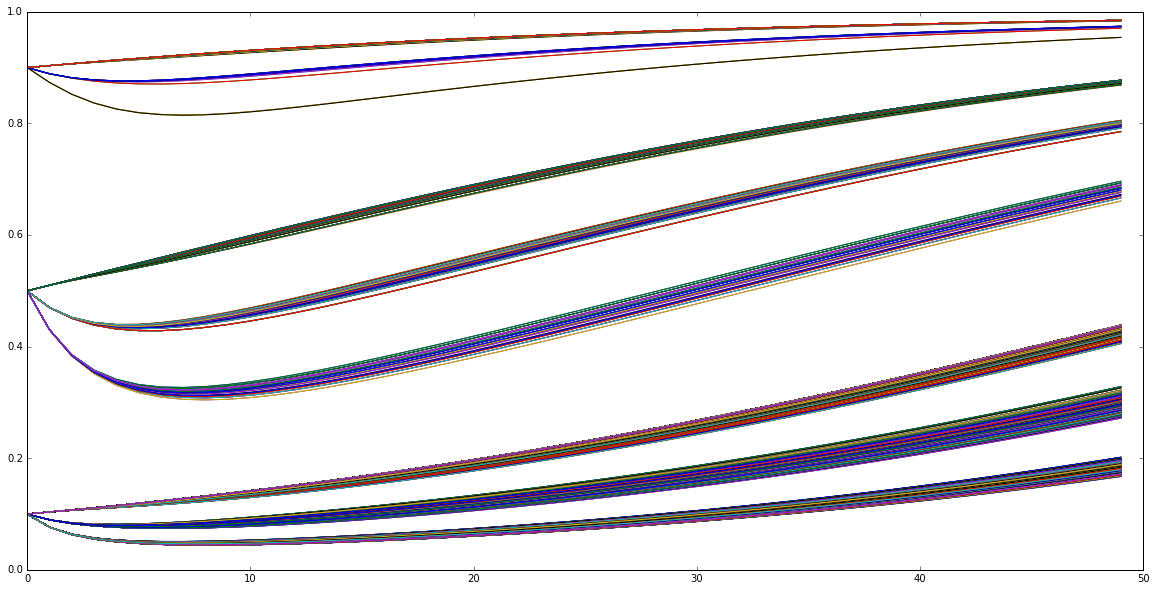

In [65]:
plt.figure(figsize=(20,10))
for edge in g_new.edges():
    source, target = edge
    state_tuples = g_new[source][target]['weightTimeLine'].items()# node[node]['activityTimeLine'].items()
    plt.plot(*zip(*state_tuples))
    #plt.show()

## Drafts from now on

In [ ]:
g_new.node['s070']

In [ ]:
# s004 is the source, and s007 is the target
g.get_edge_data('s004', 's007').values()[0]['weight']

In [ ]:
g['s070']['s088'][0]['weight'] = 11.9

In [ ]:
g['s070']['s055'][0]

In [ ]:
for source, target in g.edges():
    if g.get_edge_data(source, target).values()[0]['weight'] > 0.11:
        print source, target, g.get_edge_data(source, target).values()[0]['weight']

In [56]:
def logistic(number):
    steepness = 0.3
    threshold = 10
    log_number = (1 / (1 + np.exp(-steepness * (number - threshold))) - 1 / (1 + np.exp(steepness * threshold))) * \
                (1 + np.exp(-steepness * threshold))
    return log_number

In [66]:
#for i in np.arange(0, 100, 0.1):
#    print i, logistic(i)